<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-09-04 21:08:40--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  43.0MB/s    in 3.6s    

2025-09-04 21:08:44 (42.6 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



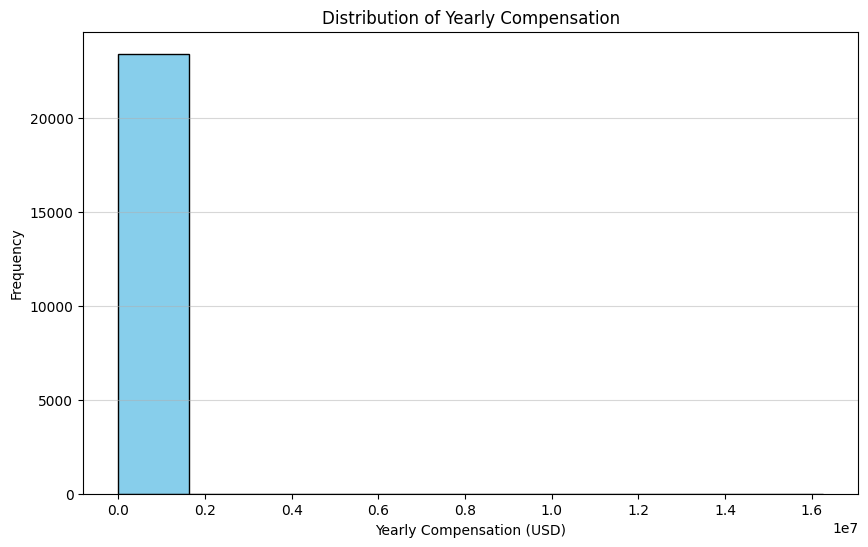

In [4]:
## Write your code here

df["ConvertedCompYearly"].dropna().plot(
    kind="hist", bins=10, figsize=(10,6), color="skyblue", edgecolor="black"
)
plt.title("Distribution of Yearly Compensation")
plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.5)
plt.show()


##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



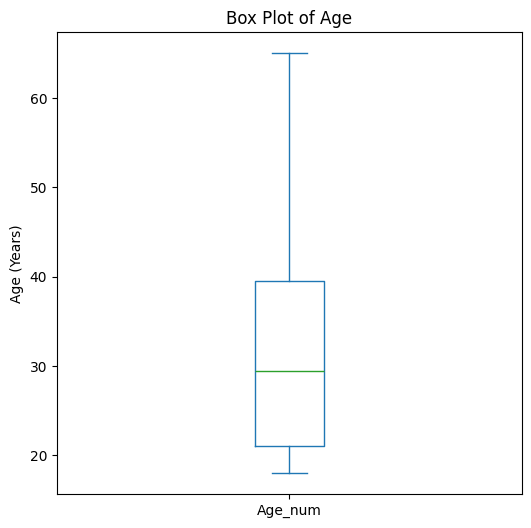

In [7]:
import re
import numpy as np

def clean_age(val):
    if pd.isna(val): 
        return np.nan
    val = str(val)

    nums = [int(n) for n in re.findall(r"\d+", val)]
    if len(nums) == 2:  # range like "25-34"
        return (nums[0] + nums[1]) / 2
    if len(nums) == 1:  # single value like "44 years old"
        return nums[0]
    if "Under" in val: 
        return 17
    if "65" in val: 
        return 65
    return np.nan


df["Age_num"] = df["Age"].apply(clean_age)

# Box plot
df["Age_num"].dropna().plot(kind="box", figsize=(6,6))
plt.title("Box Plot of Age")
plt.ylabel("Age (Years)")
plt.show()


### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



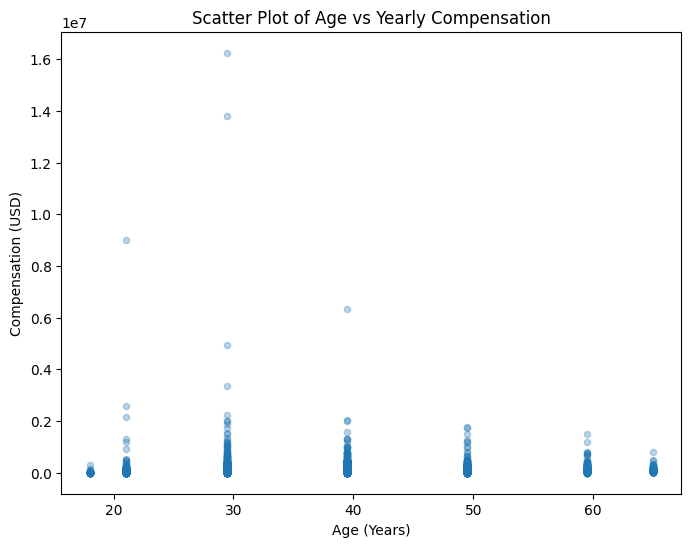

In [8]:
## Write your code here

df.plot.scatter(x="Age_num", y="ConvertedCompYearly", alpha=0.3, figsize=(8,6))
plt.title("Scatter Plot of Age vs Yearly Compensation")
plt.xlabel("Age (Years)")
plt.ylabel("Compensation (USD)")
plt.show()


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


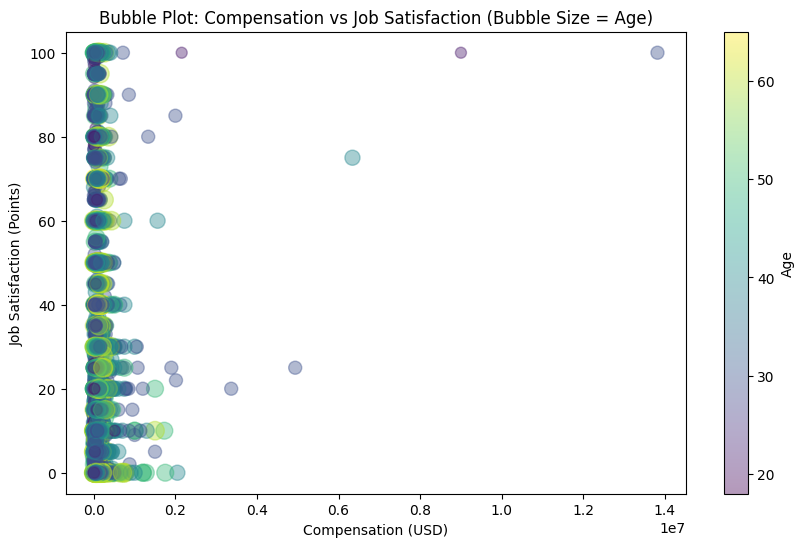

In [9]:
## Write your code here

plt.figure(figsize=(10,6))
plt.scatter(
    df["ConvertedCompYearly"], 
    df["JobSatPoints_6"], 
    s=df["Age_num"]*3,  
    alpha=0.4, 
    c=df["Age_num"], cmap="viridis"  
)
plt.title("Bubble Plot: Compensation vs Job Satisfaction (Bubble Size = Age)")
plt.xlabel("Compensation (USD)")
plt.ylabel("Job Satisfaction (Points)")
plt.colorbar(label="Age")
plt.show()


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



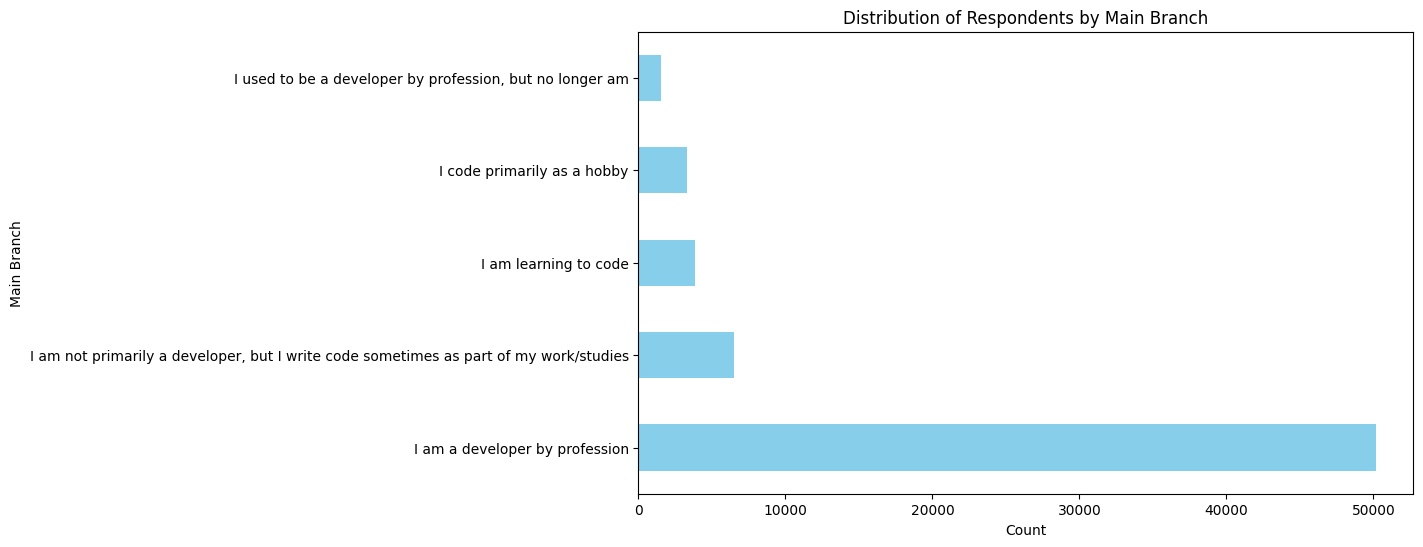

In [10]:
## Write your code here

plt.figure(figsize=(10,6))
df["MainBranch"].value_counts().plot(kind="barh", color="skyblue")
plt.title("Distribution of Respondents by Main Branch")
plt.xlabel("Count")
plt.ylabel("Main Branch")
plt.show()


##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



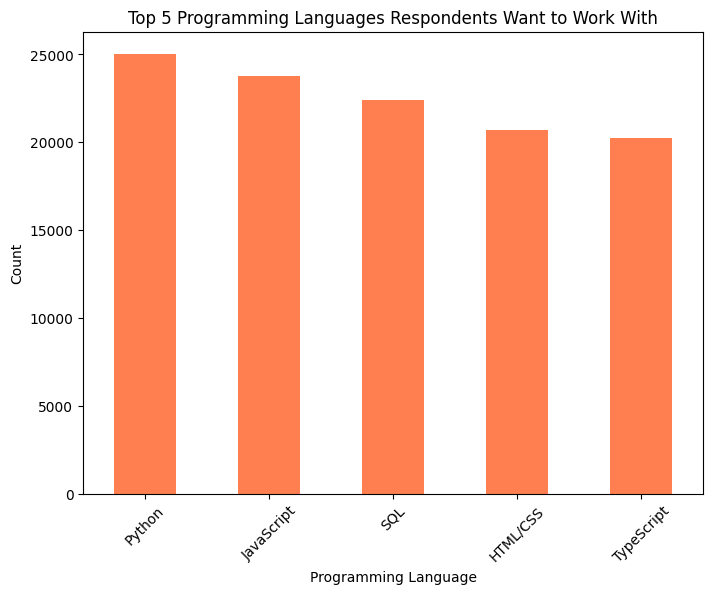

In [11]:
## Write your code here

lang_counts = (
    df["LanguageWantToWorkWith"]
    .dropna()
    .str.split(";")
    .explode()
    .value_counts()
    .head(5)
)


plt.figure(figsize=(8,6))
lang_counts.plot(kind="bar", color="coral")
plt.title("Top 5 Programming Languages Respondents Want to Work With")
plt.xlabel("Programming Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


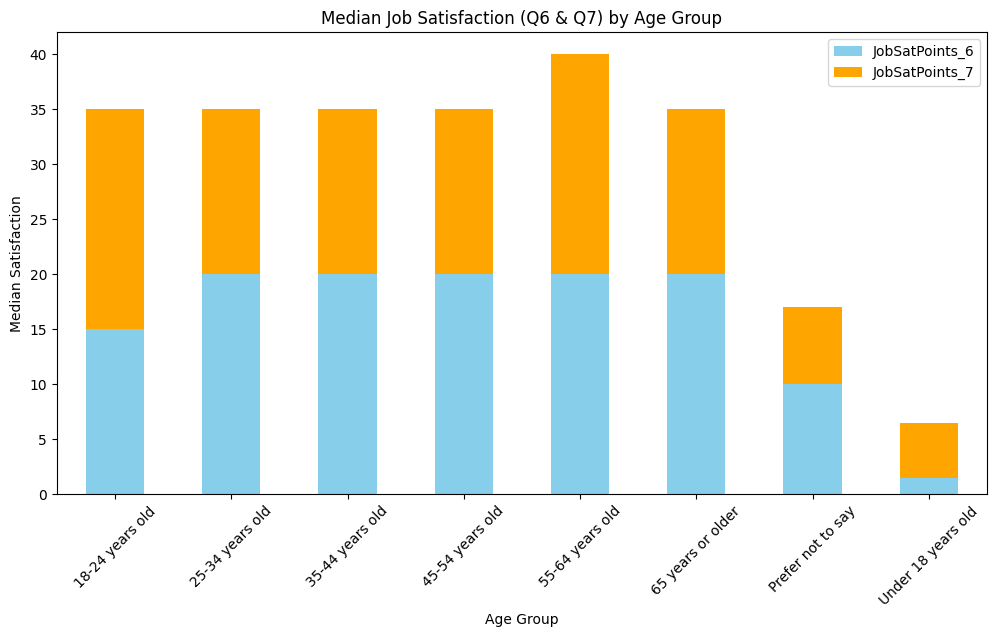

In [12]:
## Write your code here

job_sat = df.groupby("Age")[["JobSatPoints_6", "JobSatPoints_7"]].median()


job_sat.plot(
    kind="bar",
    stacked=True,
    figsize=(12,6),
    color=["skyblue", "orange"]
)

plt.title("Median Job Satisfaction (Q6 & Q7) by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Median Satisfaction")
plt.xticks(rotation=45)
plt.legend(["JobSatPoints_6", "JobSatPoints_7"])
plt.show()


##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



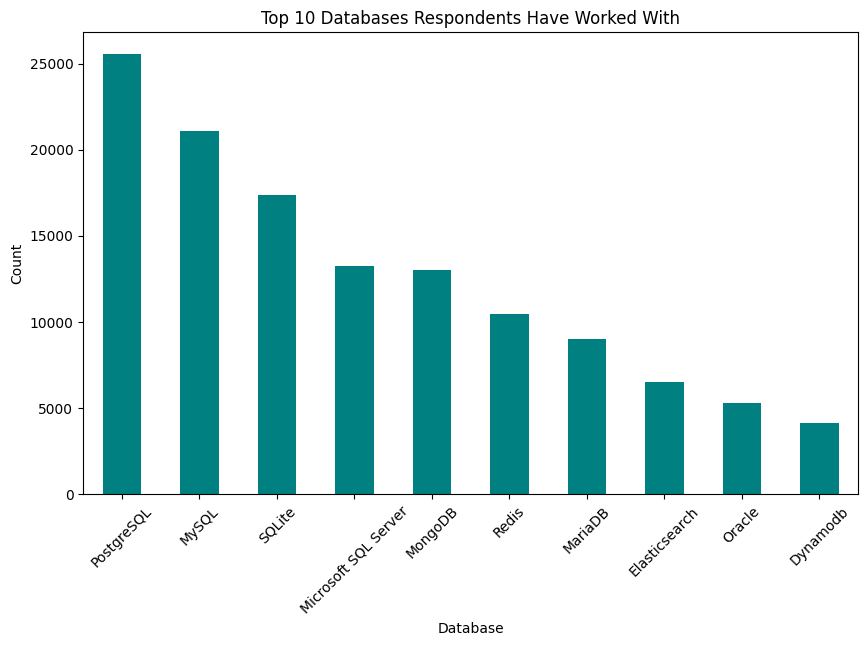

In [13]:
## Write your code here

db_data = df["DatabaseHaveWorkedWith"].dropna().str.split(";")
db_data = db_data.explode().str.strip()


db_counts = db_data.value_counts().head(10)  # top 10 databases

db_counts.plot(kind="bar", figsize=(10,6), color="teal")

plt.title("Top 10 Databases Respondents Have Worked With")
plt.xlabel("Database")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



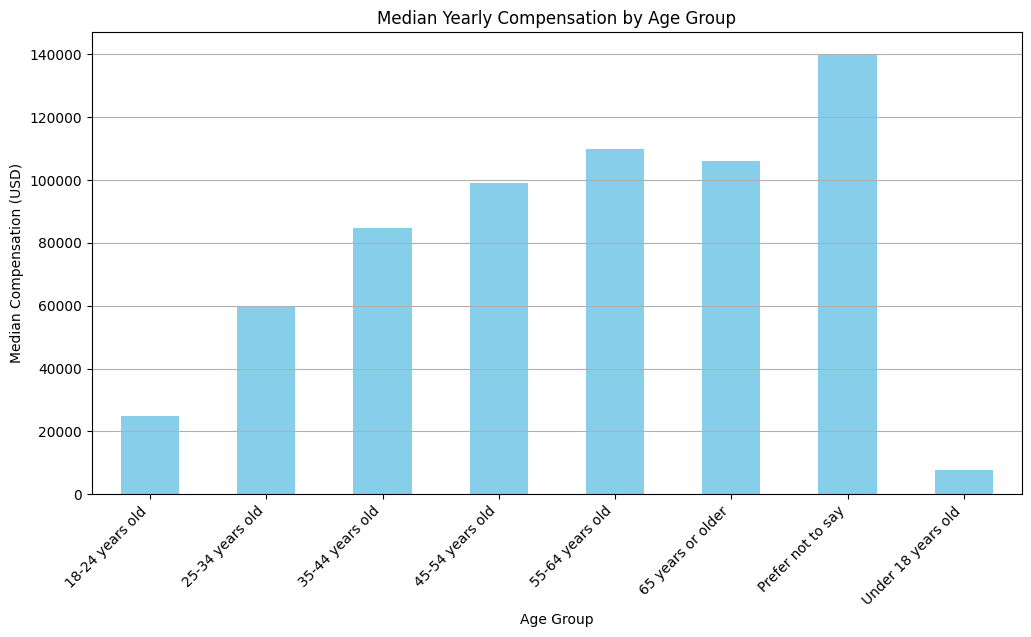

In [14]:
## Write your code here

comp_by_age = df.groupby("Age")["ConvertedCompYearly"].median().dropna()


comp_by_age.plot(kind="bar", figsize=(12,6), color="skyblue")

plt.title("Median Yearly Compensation by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Median Compensation (USD)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.show()


##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



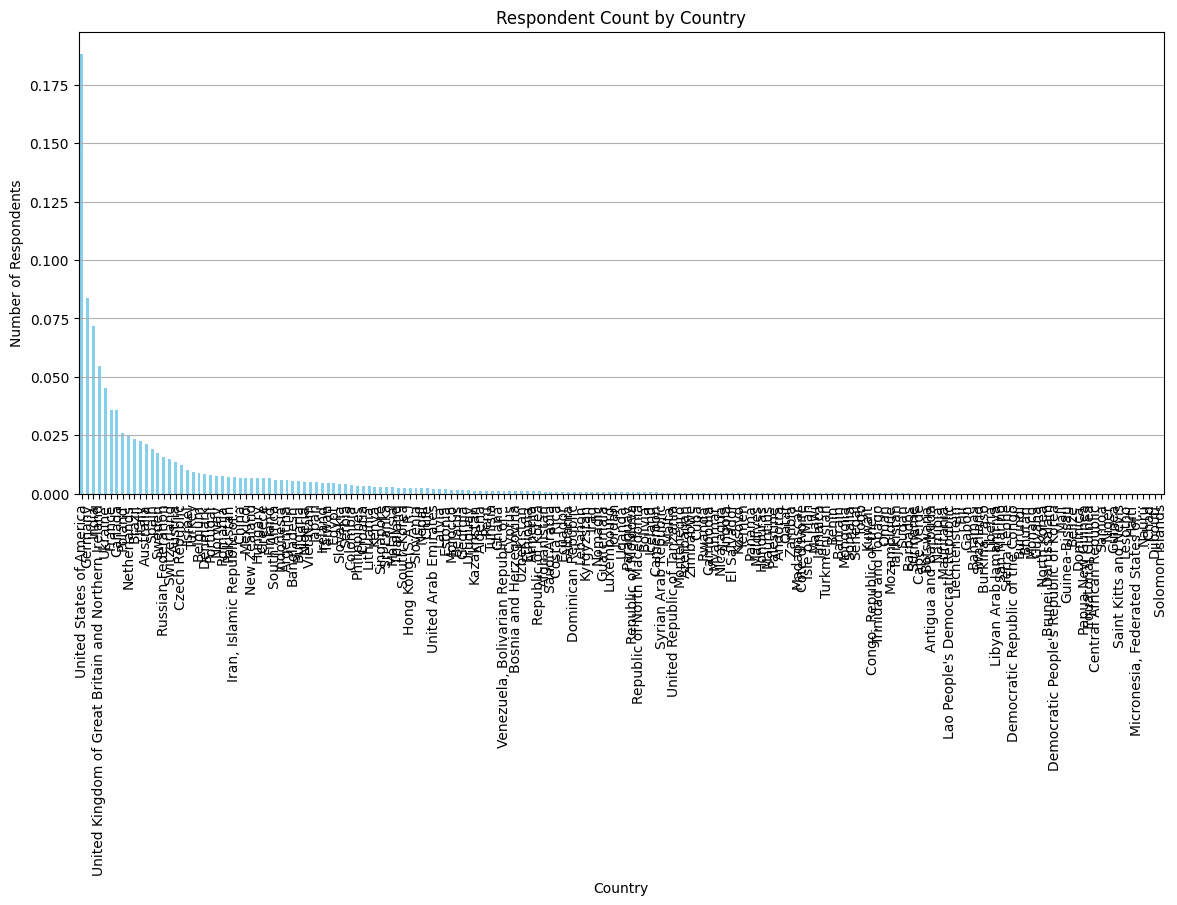

In [16]:
## Write your code here

country_counts = df["Country"].value_counts(10)


country_counts.plot(kind="bar", figsize=(14,6), color="skyblue")

plt.title("Respondent Count by Country")
plt.xlabel("Country")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=90)
plt.grid(axis="y")
plt.show()


### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
